In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1zUCecs7Ew6ACGhbEek6hOctHBltjVlk6')

# Titanic dataset Analysis

We will analyze a dataset with information related to the famous Titanic dataset from Kaggle. The main idea is to get a general overview about this information. This work represents the final proyect for the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We will download the Titanic dataset from the kaggle repository. 

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/pradeeppoddar/titanic' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Kaggle dataset ID:  pradeeppoddar/titanic


40960it [00:00, 120565.14it/s]           

Extracting archive ./titanic.zip to ./titanic


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './titanic'

In [ ]:
import os
os.listdir(data_dir)

['train.csv', 'test.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "titanic-analysis" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "chaspeer/titanic-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaspeer/titanic-analysis


'https://jovian.ml/chaspeer/titanic-analysis'

## Data Preparation and Cleaning.

We will take a look at the data and remove the values that are not useful.



In [ ]:
import pandas as pd

### Let's import the dataset.

In [ ]:
data = pd.read_csv(r'./titanic/train.csv')

### Now let's analyze the structure and take a look at the first rows.

In [ ]:
data.shape

(891, 12)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Ok, so let's take a look at the Nan's now.

In [ ]:
data.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
(data.isna().sum() / data.shape[0]).sort_values(ascending = False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

### Based on this, we will remove the "Cabin" category as most of its values are missing, and we will replace the missing ages by its average. 

In [ ]:
data.drop('Cabin',  axis='columns', inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
mean_age = data['Age'].mean()
mean_age

29.69911764705882

In [ ]:
data['Age'].fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaspeer/titanic-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaspeer/titanic-analysis


'https://jovian.ml/chaspeer/titanic-analysis'

## Exploratory Analysis and Visualization

We are going to take a look at the main statistics of the dataset and print some graphics to understand the distribution of the main values.

*Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Now we will see the most important paremeters for the numeric values.

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### So, now we will see that the people that did not survived are a little bit older that the one that survived. Also there are not a lot of outliers. 


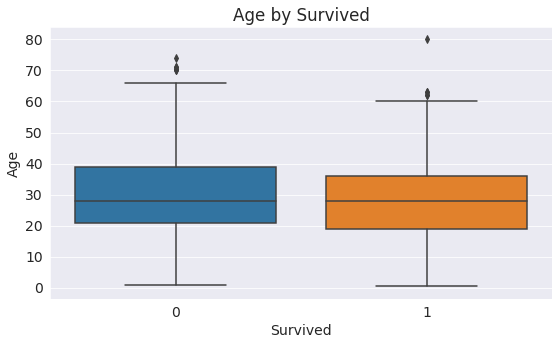

In [ ]:
features = data[['Age']].columns
sns.boxplot(x='Survived',y='Age',data=data)
plt.title('Age by Survived')
plt.show()


#### Then, we will see that the survival rate is higher in Pclass 1, against the rest of the categories. That could indicate that this class is the one which was nearer to the boats.

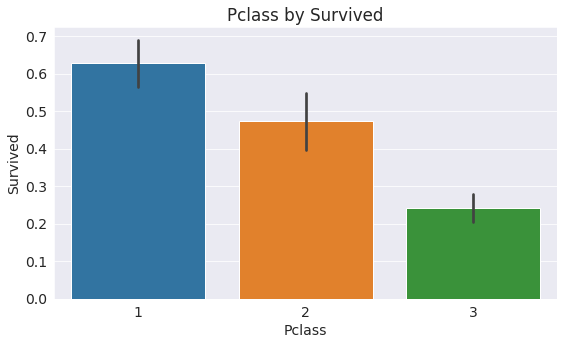

In [ ]:
sns.barplot(y="Survived",x='Pclass',data=data)
plt.title('Pclass by Survived')
plt.show()

#### We will see that most of the survivors are women. That could indicate that women had priority to get in the boats, compared to men.

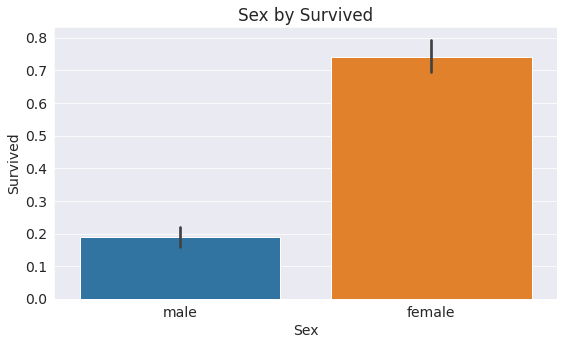

In [ ]:
sns.barplot(y="Survived",x='Sex',data=data)
plt.title('Sex by Survived')
plt.show()

#### We will notice that most of the survivors are from Southampton. A priori we cannot determine which is the cause of this, but it is an interesting variable. 

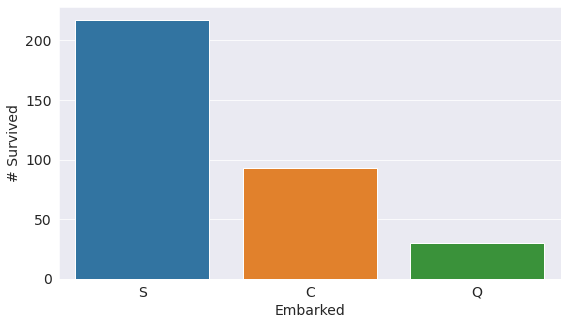

In [ ]:
sum_ = data[~data.Survived.isna()].groupby("Embarked").Survived.sum()\
                                .to_frame("# Survived").reset_index()\
                                .sort_values(by = "# Survived", ascending = False)
chart = sns.barplot(x="Embarked", y="# Survived", 
                    data=sum_)

#### Although in the previous graphic, we could see significative differences, when we determine the ratio Survived/Embarked, we can see that there is not a huge difference between these categories.

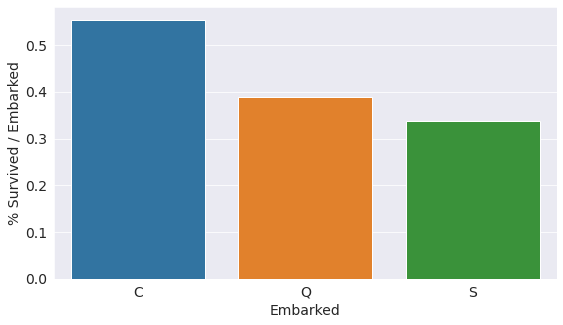

In [ ]:
suma = data[~data.Survived.isna()].groupby("Embarked").size().to_frame("# People").join(
            data[~data.Survived.isna()].groupby("Embarked").Survived.sum().to_frame("# Survived"))
suma["% Survived / Embarked"] = suma["# Survived"] / suma["# People"]
suma = suma.reset_index()
chart = sns.barplot(x="Embarked", y="% Survived / Embarked", 
                    data=suma)


#### Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaspeer/titanic-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaspeer/titanic-analysis


'https://jovian.ml/chaspeer/titanic-analysis'

## Asking and Answering Questions

We will ask different interesting questions about the dataset and answer them using formulas and innovative graphs.

#### Q1: Which is the survival rate for each sex?

In [ ]:
women = data.loc[data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = data.loc[data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


Basically, what we do at the beginning is to create some variables that had the quantity of men and women that survived. Then, what we are doing here is to divide the men and women that survived by the total men and women respectively. 

We can notice that most of men died while most women survived. 

#### Q2: How old were the Titanic passenger?

<AxesSubplot:>

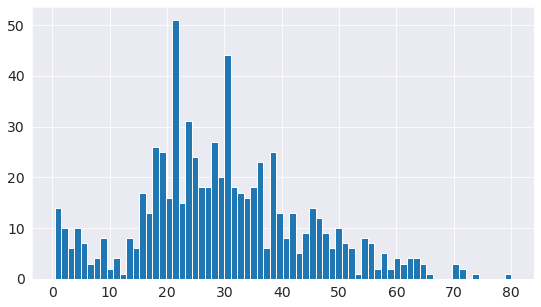

In [ ]:
data['Age'].hist(bins=70)

Here we can see the distribution. However, we have to take into account that the Nan's values were replaced by the average (which was near 30 years). So, the large line on the "30" age might not be that accurate.  

#### Q3: How many people were on board for each class according to each port?

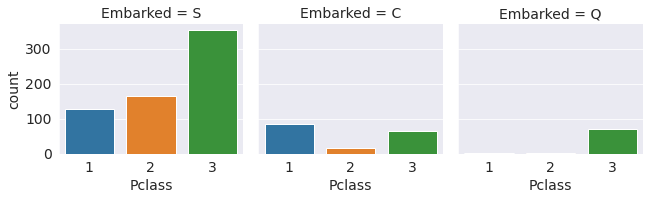

In [ ]:
sns.factorplot('Pclass',col='Embarked',data=data,kind='count',size=3)

We can see that most of the people embarked at Southampton. However, looking only at class "1", a similar qunaitity of people embarked at Southampton and Cherbourg.

#### Q4: Then, according to each port, how many people survived from each city?

<AxesSubplot:xlabel='Survived', ylabel='count'>

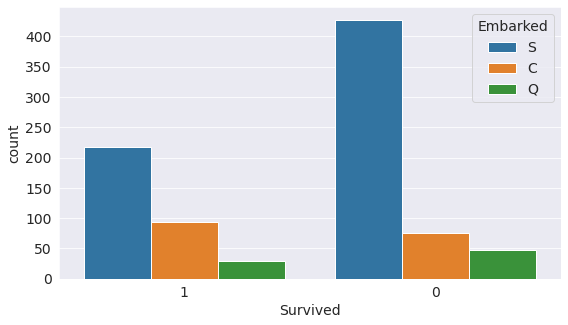

In [ ]:
sns.countplot(x='Survived', hue="Embarked", data=data, order=[1,0])

Although the mayoirty of survivors are from Southampton, if we look at the tables proportionally, we can see almost twice died for each survivor. 

#### Q5: Comparing men and women, how many of them survived and died?

<AxesSubplot:xlabel='Sex', ylabel='count'>

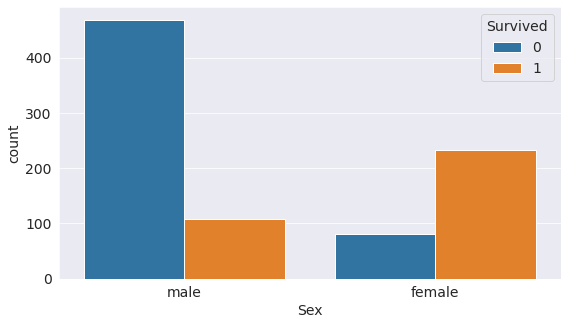

In [ ]:
sns.countplot(x = data['Sex'], hue = data['Survived'])

We can see the most of men died while the majority of women survived. The difference with question #1 is that here we can see the information in absolute values intead of a simple ratio. 

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "chaspeer/titanic-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaspeer/titanic-analysis


'https://jovian.ml/chaspeer/titanic-analysis'

## Inferences and Conclusion

To sum up, we can conclude that more women survived than men, which validates the theory that "women and children go to the boats first". Moreover, a lot of people embarked at Southampton compared to the other two ports. And last but not least, we can determine that almost all passengers were between 20 to 30 years.  

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

This dataset is ideal to give the first steps with Data Analysis, it worths every minut spent doing this analysis. 

> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'